<a href="https://colab.research.google.com/github/zza0818/py-11/blob/master/homework/Summary_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[[머신러닝 강의 05] 파이썬(Phython) 클래스](#scrollTo=nipjknneiXs3)

>>[클래스 - class](#scrollTo=PzXVBR9VBUKF)

>>>[클래스 변수(class variable)과 클래스 메서드(class method)](#scrollTo=ozIVYe8Ffatz)

>>>[private 멤버변수(variable)와 private 멤버메서드(method)](#scrollTo=y2OentKSfjZb)

>>>[외부에서 가져온 함수 이름과 클래스의 메소드 이름이 동일할 때 처리하는 방법](#scrollTo=xfVRjdQbhOII)

>>[예외처리 - exception](#scrollTo=IVg_yNV6RLLK)

>>[with 구문](#scrollTo=ox5IkUZelG8J)

>>>[ 일반적인 방법](#scrollTo=-RRF-eNXljF6)

>>>[with 구문을 사용한 방법](#scrollTo=h3o0a-o3lnlG)



#[머신러닝 강의 05] 파이썬(Phython) 클래스

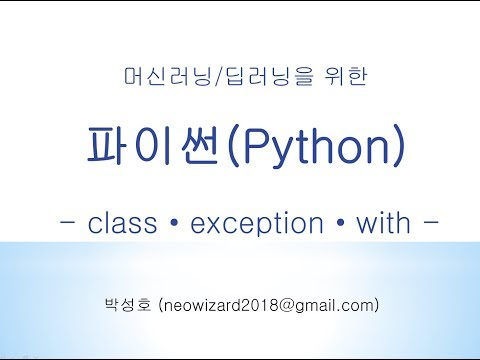

In [0]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('5Xy5Ju7hYo4')  # 파이썬 클래스, 예외처리, with



---



## 클래스 - class

 * 파이썬 클래스는 class 키워드를 사용하여 자신만의 데이터타입을 만들 수 있음



In [0]:
# class 클래스이름:
#   def __init__(self, 인수, ...): # 생성자
#   def 메서드이름(self, 인수, ...) # 메서드



*   파이썬 클래스에서는 init 메서드가 생성자(constructor) 역할을 수행하며, 인스턴스가 만들어 질 때 한번만 호출됨

*   파이썬에서는 클래스 메서드의 첫번째 인수로 '자신의 인스턴스'를 나태내는 self를 반드시 기술해야 함

*   기본적으로 파이썬에서는 메서드와 속성 모두 public






In [0]:
# 클래스 내부의 메서드에서는 무조건 첫번째 인수를 자기 자신을 나타내는 self로 지정해 주어야 함.

class Person:
  
  def __init__(self, name): # (생성자, constructor) 메서드 
                            # __init__ : 파이썬 클래스가 반드시 가져야 하는 메서드
                            # 인스턴스가 만들어 질 때 자동으로 한번만 호출됨
    self.name = name
    print(self.name + " is intialized")
    
  def work(self, company): # 메서드
    print(self.name + " is working in " + company)
    
  def sleep(self): # 메서드
    print(self.name + " is sleeping")
    
# Person instance 2개 생성
obj = Person("PARK")

# method call
obj.work("ABCDEF")
obj.sleep()

# 속성이 직접 접근, 기본적으로 파이썬에서는 모두 public
print("current person object is ", obj.name)

PARK is intialized
PARK is working in ABCDEF
PARK is sleeping
current person object is  PARK




---



### 클래스 변수(class variable)과 클래스 메서드(class method)



*   클래스 변수(class variable)는 해당 클래스로 생성된 모든 인스턴스가 공통으로 사용하는 변수임.

   => 클래스 변수는 클래스 내외부에서 "클래스명.클래스 변수명"으로 접근 할 수 있음








*   클래스 메서드(class method)는 메서드 앞에 @classmethod를 반드시 표시하여 해당 메서드가 클래스 메서드임을 표시함.

   => 클래스 메서드는 객체 인스턴스를 의미하는 self 대신 cls라는 클래스를 의미하는 파라미터를 인수로 전달받음






In [0]:
class Person:
  
  #클래스 변수
  count = 0   # class variable
  
  def __init__(self, name):
    self.name = name
    Person.count += 1   # class 변수 count 증가
    print(self.name + " is initialized")
    
  def work(self, company):
    print(self.name + " is working in " + company)
    
  def sleep(self):
    print(self.name + " is sleeping")
    
  @classmethod
  # 클래스 메소드
  def getCount(cls):  # class method # cls : class 뜻함
                      # 클래스 메소드는 앞에 무조건 @classmethod를 명시하여야 함  
                      #                 첫번째 인수를 무조건 class를 뜻하는 cls로 지정해주어야 함.
    return cls.count
  
# Person instance 2개 생성
# count 변수는 둘다 공유하고 있음
obj1 = Person("PARK")
obj2 = Person("KIM")

# method call
obj1.work("ABCDEF")

obj2.sleep()

# 속성에 직접 접근, 기본적으로 파이썬에서는 모두 public
print("current person object in ", obj1.name, ", ", obj2.name)

# class method 호출
print("Person count ==", Person.getCount() )

# ckass variable direct access
print(Person.count)

PARK is initialized
KIM is initialized
PARK is working in ABCDEF
KIM is sleeping
current person object in  PARK ,  KIM
Person count == 2
2




---



### private 멤버변수(variable)와 private 멤버메서드(method)



*   파이썬은 기본적으로 모든 멤버가 public 이기 때문에, 외부에서 직접 접근 가능함

*   멤버변수(variable), 멤버메서드(method)를 멤버변수, 멤버메서드 형태로 선언한다면 private으로 설정 할 수 있음



★ 언더바 두개를 포함하여 변수와 메서드를 선언해주면 private


In [0]:
# ERROR CODE

class PrivateMemberTest:
  
  def __init__(self, name1, name2):
    
    self.name1 = name1 # 인스턴스 변수 # public instance
    self.__name2 = name2   # 인스턴스 변수 # private member variable
    print("initialized with " + name1 + " ," +  name2)
    
  def getNames(self): # public method
    self.__printNames()
    return self.name1, self.__name2
  
  def __printNames(self):   # private member method
    print(self.name1, self.__name2)
    
# 인스턴스 생성
obj = PrivateMemberTest("PARK", "KIM") # 객체 생성

print(obj.name1) # public # PARK 출력
print(obj.getNames()) # public
print(obj.__printNames())   # error 발생 # private # private method 이므로 접근 불가능
print(obj.__name2)          # error 발생 # private 변수이므로 접근이 불가능
                            # 외부 객체 obj를 통하여 변수 접근이 불가능 함

initialized with PARK ,KIM
PARK
PARK KIM
('PARK', 'KIM')


AttributeError: ignored

In [0]:
obj = PrivateMemberTest("PARK", "KIM")

initialized with PARK ,KIM


In [0]:
print(obj.name1)

PARK


In [0]:
print(obj.getNames())

PARK KIM
('PARK', 'KIM')


In [0]:
print(obj.__printNames())

AttributeError: ignored

In [0]:
print(obj.__name2)

AttributeError: ignored



---



### 외부에서 가져온 함수 이름과 클래스의 메소드 이름이 동일할 때 처리하는 방법



*   외부함수와 클래스 method name이 같은 경우
   
   => C++, Java 언어의 this 처럼 self 를 통해 method 호출
 
    => self 를 붙이지 않으면 동일한 이름의 외부 함수 호출됨



In [0]:
def print_name(name): # 외부 함수
  print("[def] ", name)
  
class SameTest: 
  
  def __init__(self):
    # 아무것도 안하기 때문에 pass
    pass
  
  # 외부 함수와 동일한 이름으로 method 정의
  def print_name(self, name):
    print("[SameTest] ", name)
    
  def call_test(self):
    
    # 외부 함수 호출
    print_name("KIM") # 외부 함수가 호출됨
    
    # 클래스 내부 method 호출
    self.print_name("KIM") # 클래스 메소드로써 출력하려면 self라는 키워드를 사용하여야 함
    
# create SameTest object
obj = SameTest() # 객체 생성

# call function print_name
print_name("LEE") # 함수 이름을 호출(외부 함수)

# call method print_name
obj.print_name("LEE") # 객체의 메소드 호출

# call method call_test
obj.call_test() # 외부함수 출력 후 클래스 내부 메서드 출력

[def]  LEE
[SameTest]  LEE
[def]  KIM
[SameTest]  KIM




---



## 예외처리 - exception



*   파이썬 excemtpion은 try...except문을 사용함.  
try 블록에서 에러가 발생 시 except 문으로 이동하여 예외 처리 수행

*   발생된 exception을 그냥 무시하기 위해서는 보통 pass문을 사용하며, 또한 개발자가 에러를 던지기 위해서는 raise문을 사용함

* try 문은 또한 finally 문을 가질 수도 있는데, finally 블럭은 try 블럭이 정상적으로 실행되든, 에러가 발생하여 except이 실행되든 항상 마지막에 실행됨


In [0]:
# calc는 입력으로 list_data를 받아 모두 더하여 합을 구하는 간단한 프로그램

def calc(list_data):
  
  sum = 0
  
  try: # try 블록에서 에러가 발생하면 except 문으로 이동하여 exception 처리 
    sum = list_data[0] + list_data[1] + list_data[2]
    
    if sum < 0:
      raise Exception("Sum is minus")
      
  except IndexError as err:
    print(str(err))
  except Exception as err:
    print(str(err))
  finally: # 예외 상황과 관련없이 항상 마지막에 실행됨
    print(sum)

In [0]:
# 함수에서는 3개의 입력값을 받는 list를 예상했으나, 2개의 입력값을 받는 list 들어옴
# list의 index와 관련된 exception  발생

#  except IndexError as err:
#    print(str(err))

calc([1, 2]) # index error 발생

list index out of range
0


In [0]:
calc([1, 2, 3])

6


In [0]:
calc([1, 2, 3, 4, 5, 6]) # 인덱스 크기가 초과되어도 인덱스 0, 1, 2만 더해준다 # exception이 발생하지 않는다

6


raise는 인위적으로 exception을 발생시키는 것으로써 실제 개발하는 도중 발생하는 다양한 Error를  파악하고 이를 해결하기 위해 Debugging 용도로 많이 사용하고 있음

In [0]:
# sum = list_data[0] + list_data[1] + list_data[2] 구문에서는 exception이 발생하지 않음
# raise는 인위적으로 exception을 발생시키는 것으로써 실제 개발하는 도중 발생하는 다양한 Error를  파악하고 이를 해결하기 위해 Debugging 용도로 많이 사용하고 있음
# except Exception as err:
#   print(str(err))        의 exception이 발생함

calc([1, 2, -100]) # 인위적인 exception 발생

Sum is minus
-97




---



## with 구문



*   일반적으로 파일 (file) 또는 세션 (session) 을 사용하는 순서는 다음과 같음

   open() => read() 또는 write() => close()
   
      3단계 과정




*   그러나 파이썬에서 with 구문을 사용하면 명시적으로 리소스 close() 를 해주지 않아도 자동으로 close() 해주는 기능이 있음. 

   with 블록을 벗어나는 순간 파일 파일이나 세션 등의 리소스를 자동으로 close 시킴

   => 딥러닝 프레임워크인 TensorFlow 의 session 사용시 자주 사용됨

###  일반적인 방법

In [0]:
# 일반적인 방법

f = open("./file_test", 'w')

f.write("Hello, Python !!!")

f.close()

### with 구문을 사용한 방법

In [0]:
# with 구문을 사용한 방법
# with 블록을 벗어나는 순간 파일 객체 f가 자동으로 close 됨.

with open(".file_test", 'w') as f:
  f.write("Hello, Python !!!")
  
  #파일 close